In [3]:
import os
os.chdir("/nfs/students/winter-term-2020/project-4/yurtkulus/project-4")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import os
import torch
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from pytorch_lightning import Trainer, seed_everything

from src.data.mnist import MNISTDataModule
from src.data.fashionmnist import FashionMNISTDataModule
from src.models.pixelcnn import PixelCNN
from src.experiments.experiment import Experiment
from pathlib import Path
import pickle

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
seed_everything(42)

42

In [10]:
model = PixelCNN()
mnist_model = model.load_from_checkpoint('models/PixelCNN_MNIST_background_subtraction/PixelCNN_MNIST_background_subtraction.ckpt', background_subtraction=True).cuda()
fashmnist_model = model.load_from_checkpoint('models/PixelCNN_FASHION_MNIST_background_subtraction/PixelCNN_FASHION_MNIST_background_subtraction.ckpt', background_subtraction=True).cuda()

In [11]:
mnist_data = MNISTDataModule()
mnist_data.prepare_data()
mnist_data.setup()
mnist_testdataloader = mnist_data.test_dataloader()

fashmnist_data = FashionMNISTDataModule()
fashmnist_data.prepare_data()
fashmnist_data.setup()
fashmnist_testdataloader = fashmnist_data.test_dataloader()

In [12]:
trainer = Trainer(max_epochs=50, gpus=1, auto_lr_find=True)

mnist_model.eval()
mnist_test_mnist = trainer.test(mnist_model, test_dataloaders=[mnist_testdataloader], verbose=False)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Set SLURM handle signals.


/nfs/students/winter-term-2020/project-4/yurtkulus/anaconda3/envs/ml-lab/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning: The testing_epoch_end should not return anything as of 9.1.to log, use self.log(...) or self.write(...) directly in the LightningModule
  warnings.warn(*args, **kwargs)


In [16]:
fashmnist_model.eval()
mnist_test_fashion = trainer.test(mnist_model, test_dataloaders=[fashmnist_testdataloader], verbose=False)

Set SLURM handle signals.


In [17]:
mnist_losses = torch.Tensor(mnist_test_mnist[1]['loss']).numpy()
fashion_losses = torch.Tensor(mnist_test_fashion[1]['loss']).numpy()

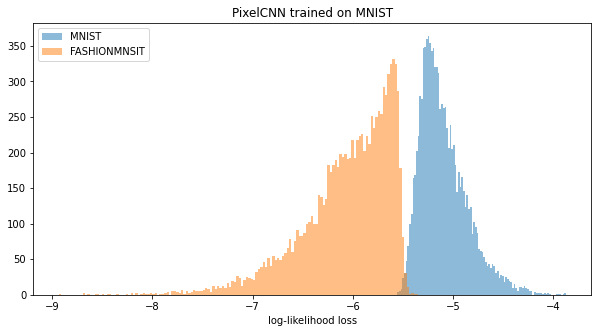

In [18]:
plt.figure(figsize=(10,5))

plt.hist(mnist_losses * -1, 100, alpha=0.5, label='MNIST')
plt.hist(fashion_losses * -1, 150, alpha=0.5, label='FASHIONMNSIT')
# plt.hist(constantlosses * -1, 10, alpha=0.5, label='CONSTANT BLACK')
# plt.hist(constantlosses2 * -1, 10, alpha=0.5, label='CONSTANT WHITE')
# plt.hist(randomlosses * -1, 100, alpha=0.5, label='RANDOM')
plt.legend(loc='upper left')
plt.xlabel('log-likelihood loss')
plt.title('PixelCNN trained on MNIST')
plt.show()

In [19]:
fashionmnist_test_mnist = trainer.test(fashmnist_model, test_dataloaders=[mnist_testdataloader], verbose=False)

Set SLURM handle signals.


In [20]:
fashionmnist_test_fashion = trainer.test(fashmnist_model, test_dataloaders=[fashionmnist_testdataloader], verbose=False)

Set SLURM handle signals.


In [21]:
fashionmnist_mnnistlosses = torch.Tensor(fashionmnist_test_mnist[1]['loss']).numpy()
fashionmnist_fashionlosses = torch.Tensor(fashionmnist_test_fashion[1]['loss']).numpy()

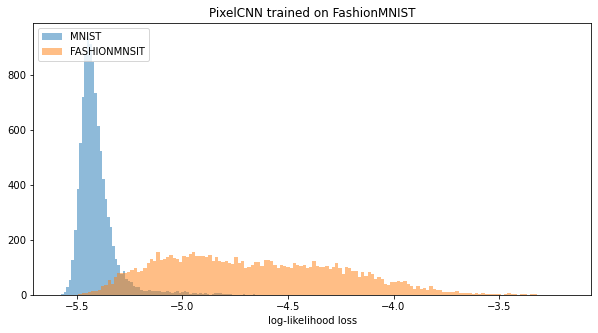

In [22]:
plt.figure(figsize=(10,5))
plt.hist(fashionmnist_mnnistlosses * -1, 100, alpha=0.5, label='MNIST')
plt.hist(fashionmnist_fashionlosses * -1, 150, alpha=0.5, label='FASHIONMNSIT')
plt.legend(loc='upper left')
plt.xlabel('log-likelihood loss')
plt.title('PixelCNN trained on FashionMNIST')
plt.show()

In [23]:
from src.utils.pixelcnn import generate_images, draw_likelihood_plot

/nfs/students/winter-term-2020/project-4/yurtkulus/project-4/src/utils/pixelcnn.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = F.softmax(out[:, :, i, j]).data


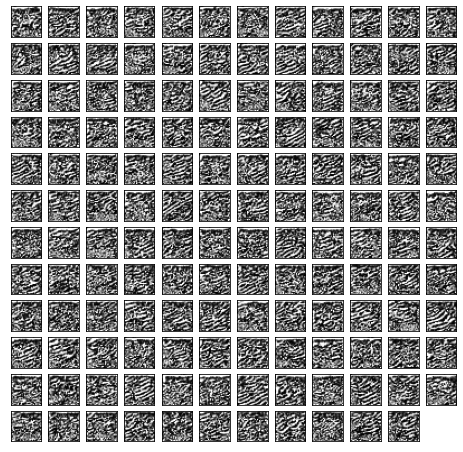

In [24]:
generate_images(mnist_model)

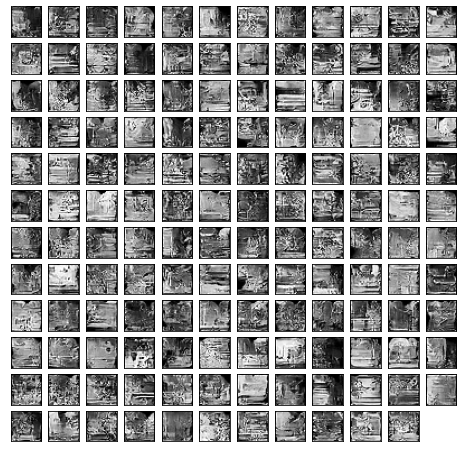

In [25]:
generate_images(fashmnist_model)

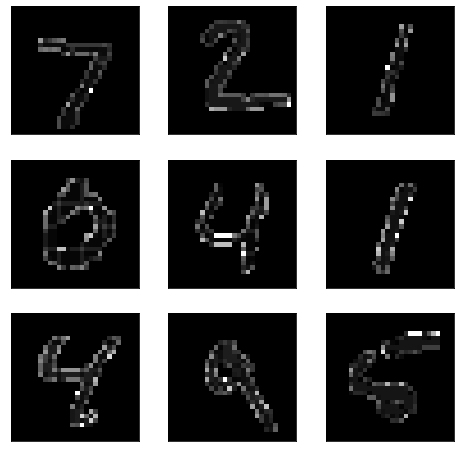

In [37]:
draw_likelihood_plot(mnist_testdataloader, mnist_model)

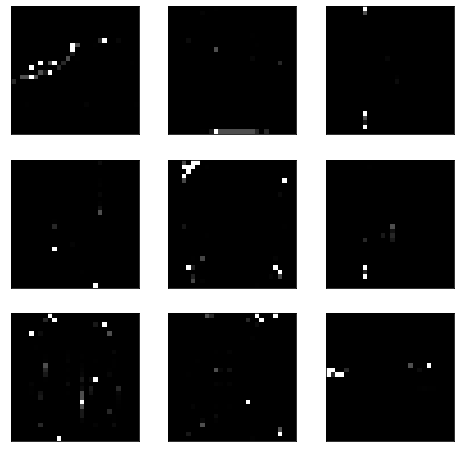

In [42]:
draw_likelihood_plot(fashmnist_testdataloader, fashmnist_model)